In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from fmp import get_daily_prices

## Define Time Period and Parameters

In [2]:
START_DATE = dt.datetime(1970,1,1)
END_DATE = dt.datetime.today()
T = 252

## Define Asset Allocation Portfolios

- Four Seasons Portfolio
- All Weather Portfolio
- Stocks 60% Bonds 40%
- Permanent Portfolio
- Equal Weight Custom Portfolio

In [3]:
fixed_asset_allocation = {'Four Seasons': {'assets': ['VTI', 'TLT', 'IEF', 'GLD', 'DBC'],
                                         'weights': np.array([0.3, 0.4, 0.15, 0.075, 0.075])},
                          'All Weather': {'assets': ['VT', 'LTPZ', 'EDV', 'VCLT', 'EMLC', 'IAU', 'BCI'],
                                         'weights': [0.35, 0.2, 0.2, 0.075, 0.075, 0.05, 0.05]},
                         'Sixty Forty': {'assets': ['VTI', 'BND'],
                                        'weights': np.array([0.6, 0.4])},
                         'Permanent': {'assets': ['VTI', 'IEF', 'TLT', 'GLD'],
                                      'weights': np.array([0.25, 0.25, 0.25, 0.25])},
                         'SPY (Benchmark)': {'assets': ['SPY'],
                                      'weights': np.array([1])},
                         'Custom Portfolio': {'assets': ['SPY', 'VT', 'TLT', 'GLD'],
                                             'weights': np.array([0.25, 0.25, 0.25, 0.25])}}

## Gather Symbols Used in Portfolios

In [4]:
combined = []

for portfolio in fixed_asset_allocation.keys():
    combined = combined + fixed_asset_allocation[portfolio]['assets']

combined_assets = list(set(combined))
combined_assets

['LTPZ',
 'IEF',
 'SPY',
 'VT',
 'VTI',
 'TLT',
 'BCI',
 'BND',
 'VCLT',
 'GLD',
 'EMLC',
 'EDV',
 'IAU',
 'DBC']

In [5]:
prices = pd.DataFrame()
for asset in combined_assets:
    prices[asset] = get_daily_prices(asset)['Close']
prices.dropna(inplace=True)
prices

,LTPZ,IEF,SPY,VT,VTI,TLT,BCI,BND,VCLT,GLD,EMLC,EDV,IAU,DBC
Date,,,,,,,,,,,,,,
2017-03-31,66.430000,105.589996,235.740005,65.220001,121.320000,120.709999,25.030001,81.080002,89.900002,118.72,37.020000,111.150002,24.020000,15.21
2017-04-03,66.650002,105.949997,235.330002,65.160004,121.019997,121.669998,25.030001,81.199997,90.209999,119.35,36.840000,112.669998,24.139999,15.15
2017-04-04,66.389999,105.800003,235.479996,65.199997,121.080002,121.010002,24.973000,81.110001,89.870003,119.62,36.919998,111.910004,24.180000,15.30
2017-04-05,66.769997,106.000000,234.779999,64.949997,120.589996,121.379997,25.094999,81.180000,90.080002,119.62,36.900002,112.290001,24.200001,15.33
2017-04-06,66.660004,105.930000,235.440002,65.050003,120.970001,121.199997,25.160000,81.209999,90.059998,119.18,36.860001,111.959999,24.100000,15.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,89.470000,116.960000,446.580000,106.380000,230.600000,149.300000,27.200000,86.400000,108.840000,167.74,30.930000,141.860000,34.140000,19.51
2021-09-14,90.000000,117.400000,444.170000,105.750000,229.210000,151.110000,27.280000,86.610000,109.420000,168.82,30.890000,143.960000,34.370000,19.50
2021-09-15,89.670000,117.200000,447.880000,106.390000,231.100000,150.580000,27.750000,86.530000,109.170000,167.83,30.920000,143.460000,34.160000,19.82


In [6]:
prices

,LTPZ,IEF,SPY,VT,VTI,TLT,BCI,BND,VCLT,GLD,EMLC,EDV,IAU,DBC
Date,,,,,,,,,,,,,,
2017-03-31,66.430000,105.589996,235.740005,65.220001,121.320000,120.709999,25.030001,81.080002,89.900002,118.72,37.020000,111.150002,24.020000,15.21
2017-04-03,66.650002,105.949997,235.330002,65.160004,121.019997,121.669998,25.030001,81.199997,90.209999,119.35,36.840000,112.669998,24.139999,15.15
2017-04-04,66.389999,105.800003,235.479996,65.199997,121.080002,121.010002,24.973000,81.110001,89.870003,119.62,36.919998,111.910004,24.180000,15.30
2017-04-05,66.769997,106.000000,234.779999,64.949997,120.589996,121.379997,25.094999,81.180000,90.080002,119.62,36.900002,112.290001,24.200001,15.33
2017-04-06,66.660004,105.930000,235.440002,65.050003,120.970001,121.199997,25.160000,81.209999,90.059998,119.18,36.860001,111.959999,24.100000,15.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,89.470000,116.960000,446.580000,106.380000,230.600000,149.300000,27.200000,86.400000,108.840000,167.74,30.930000,141.860000,34.140000,19.51
2021-09-14,90.000000,117.400000,444.170000,105.750000,229.210000,151.110000,27.280000,86.610000,109.420000,168.82,30.890000,143.960000,34.370000,19.50
2021-09-15,89.670000,117.200000,447.880000,106.390000,231.100000,150.580000,27.750000,86.530000,109.170000,167.83,30.920000,143.460000,34.160000,19.82


## Portfolio Performance Summary

In [7]:
#portfolios = ['All Weather', 'Sixty Forty', 'Permanent', 'SPY (Benchmark)']

stats_summary = pd.DataFrame(columns = ['Portfolio', 'CAGR (%)', 'MDD (%)', 'CAGR / MDD'])
combined_cumulatives = pd.DataFrame()
for portfolio in fixed_asset_allocation.keys():
    
    port_data = pd.DataFrame()
    
    # get corresponding price data
    for column in prices.columns:
        if column in fixed_asset_allocation[portfolio]['assets']:
            port_data[column] = prices[column]
    
    # compute daily returns of individual assets
    daily_returns = port_data.pct_change()
    
    # compute daily returns of the portfolio    
    daily_returns[portfolio] = daily_returns.dot(fixed_asset_allocation[portfolio]['weights'])
    
    # compute cumulative returns
    cumulative_returns = (1 + daily_returns).cumprod()
    cumulative_returns.fillna(1, inplace=True)
    
    # save cumulative returns of the portfolio for comparison
    
    if portfolio == 'All Weather':
        allWeather = cumulative_returns
    
    if portfolio == 'Sixty Forty':
        sixtyForty = cumulative_returns
    
    if portfolio == 'Permanent':
        permanent = cumulative_returns
    
    combined_cumulatives[portfolio] = cumulative_returns[portfolio]
    
    
    # compute CAGR
    cagr = cumulative_returns**(T/len(cumulative_returns.index)) - 1
    portfolio_cagr = cagr.loc[cagr.index[-1], portfolio]

    # compute MDD
    cumulative_returns = cumulative_returns[portfolio]
    previous_peaks = cumulative_returns.cummax()
    drawdown = (cumulative_returns - previous_peaks) / previous_peaks
    #drawdown.plot()
    portfolio_mdd = drawdown.min()
    
    # save CAGR and MDD for each portfolio
    
    stats_summary = stats_summary.append({'Portfolio': portfolio,
                                         'CAGR (%)': portfolio_cagr * 100,
                                         'MDD (%)': portfolio_mdd* 100,
                                         'CAGR / MDD': abs(portfolio_cagr / portfolio_mdd).round(2)}, ignore_index=True)   

In [8]:
stats_summary.set_index('Portfolio', inplace=True)
stats_summary.sort_values('CAGR / MDD', ascending=False)

,CAGR (%),MDD (%),CAGR / MDD
Portfolio,,,
Permanent,8.163849,-11.766573,0.69
Four Seasons,9.257457,-14.960173,0.62
Custom Portfolio,10.602031,-17.388107,0.61
Sixty Forty,10.059079,-22.757991,0.44
SPY (Benchmark),15.084646,-34.104747,0.44
All Weather,6.373912,-19.665454,0.32


## Portfolio Performance Visualization

Text(0.5, 1.0, 'Portfolio Performance Comparison')

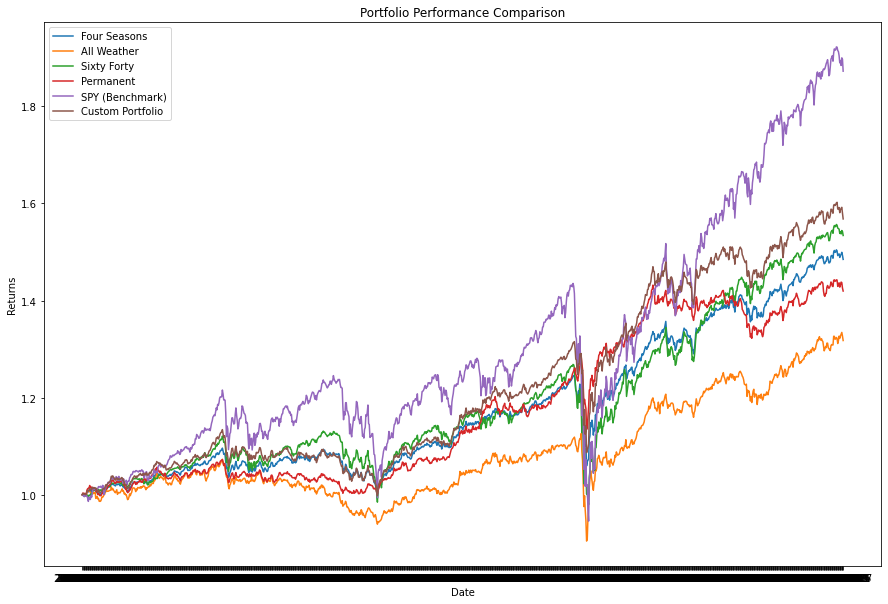

In [9]:
plt.figure(figsize=(15,10))
plt.plot(combined_cumulatives)
plt.legend(combined_cumulatives.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Portfolio Performance Comparison')

## All Weather Portfolio

Text(0.5, 1.0, 'All Weather Portfolio')

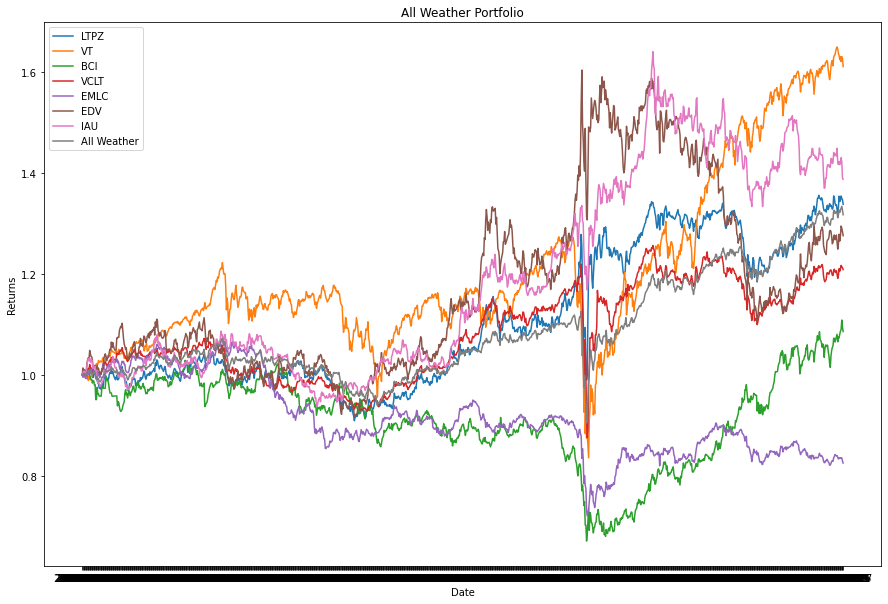

In [10]:
plt.figure(figsize=(15,10))
plt.plot(allWeather)
plt.legend(allWeather.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('All Weather Portfolio')

## Permanent Portfolio

Text(0.5, 1.0, 'Permanent Portfolio')

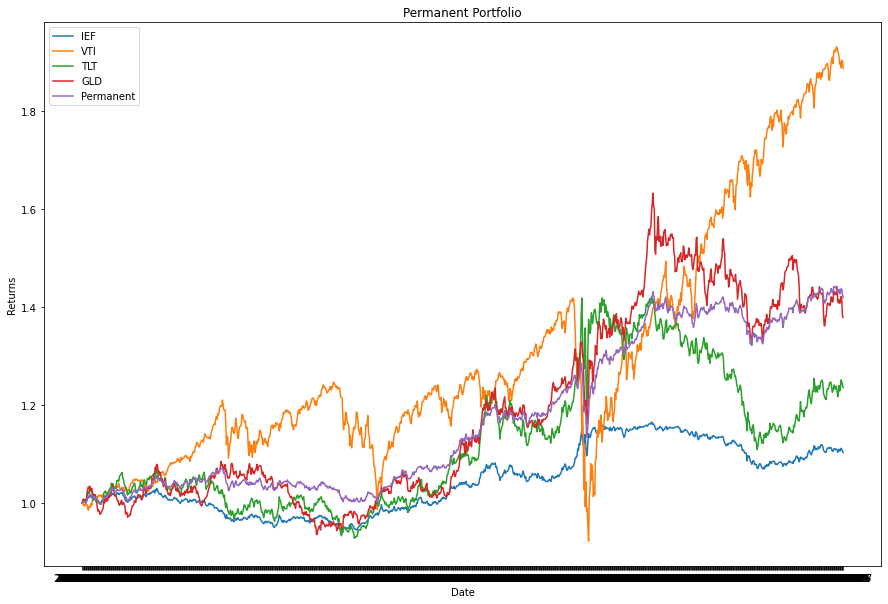

In [11]:
plt.figure(figsize=(15,10))
plt.plot(permanent)
plt.legend(permanent.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Permanent Portfolio')

## Traditonal 60% Equity + 40% Bond Portfolio

Text(0.5, 1.0, '60% Equity 40% Bond Portfolio')

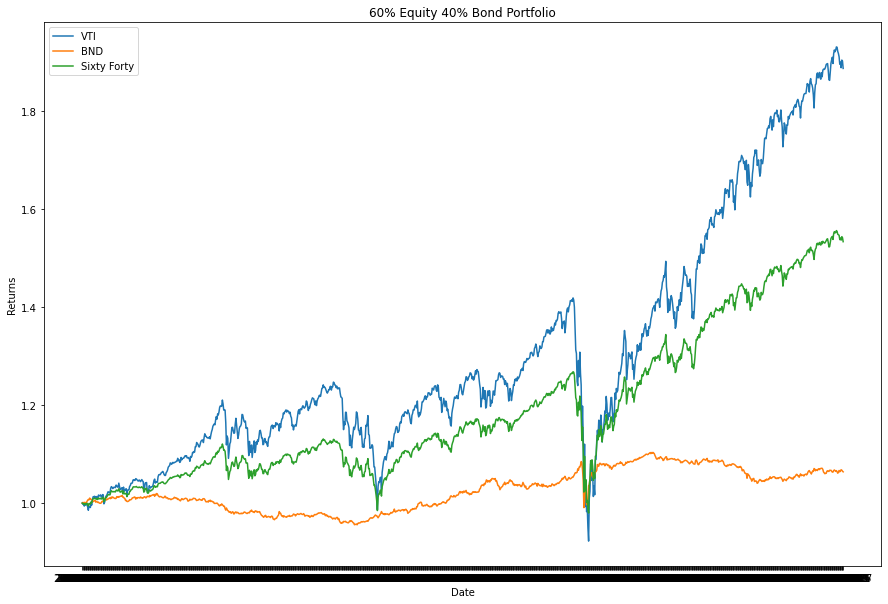

In [12]:
plt.figure(figsize=(15,10))
plt.plot(sixtyForty)
plt.legend(sixtyForty.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('60% Equity 40% Bond Portfolio')